### <center>*Big Data tools and methods report*<center>
##### <center>Matys Piotr 260337<center>


### **List 2**

### Importing all needed libraries

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate


#### Tasks 1, 2, 3

##### Function which generates data from given maths functions and based on chosen kind of interpolation - interpolates it. It returns samples of $x$ and $y$, resampled $x$ and its interpolated $y$ values and real values of $y$ calculated on the basis of given functions.

In [21]:
def generating_data_and_making_interpolation(f1, f2, n_of_left_samples, n_of_right_samples, interpolation_kind,
                                             using_cubic=False):
    left_part_samples = np.linspace(-2.5, 0, n_of_left_samples)
    right_part_samples = np.linspace(0.001, 1.5, n_of_right_samples)

    left_part_values = f1(left_part_samples)
    right_part_values = f2(right_part_samples)

    x_samples = list(left_part_samples) + list(right_part_samples)
    y_samples = list(left_part_values) + list(right_part_values)

    M = (n_of_right_samples + n_of_left_samples) * 5

    if not using_cubic:

        interpolation_object = interpolate.interp1d(x_samples, y_samples, kind=interpolation_kind)

        x_resampled_l = np.linspace(-2.5, 0, int(2 * M / 3))
        x_resampled_r = np.linspace(0, 1.5, int(M / 3))

        x_resampled = list(x_resampled_l) + list(x_resampled_r)
        y_resampled = interpolation_object(x_resampled)

        y_from_function_l = f1(x_resampled_l)
        y_from_function_r = f2(x_resampled_r)

        y_from_function = list(y_from_function_l) + list(y_from_function_r)

    else:
        interpolation_object = interpolate.CubicSpline(x_samples, y_samples)

        x_resampled_l = np.linspace(-2.5, 0, int(2 * M / 3))
        x_resampled_r = np.linspace(0, 1.5, int(M / 3))

        x_resampled = list(x_resampled_l) + list(x_resampled_r)
        y_resampled = interpolation_object(x_resampled)

        y_from_function_l = f1(x_resampled_l)
        y_from_function_r = f2(x_resampled_r)

        y_from_function = list(y_from_function_l) + list(y_from_function_r)

    return x_samples, y_samples, x_resampled, y_from_function, y_resampled

##### Drawing and comparing results

In [22]:
def drawing_plot(x_samples, y_samples, x_resampled, y_from_function, y_resampled, settings):
    
    fig, ax = plt.subplots(figsize=(18, 10))

    ax.plot(x_resampled, y_from_function, color='#DE3163', label="Beginning function", linewidth=4)
    ax.plot(x_resampled, y_resampled, '--', color='#9C27B0', label=settings['label'], markersize=5, linewidth=3)
    ax.plot(x_samples, y_samples, 'h', color='#6495ED', label='samples', markersize=15, markeredgecolor='black')

    ax.set_xticks([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_title(settings['title'], fontsize=20)

    ax.legend(shadow=True, loc='best', prop=dict(size=16))

    plt.tight_layout()
    plt.show()

##### Labels as needed arguments to drawing function

In [23]:
spline_settings = {'label': 'Cubic interpolation',
                   'title': 'Interpolation using third-level functions (cubic interpolation)'}

linear_settings = {'label': 'Linear interpolation plot',
                   'title': 'Linear interpolation'}

third_degree_settings = {'label': 'Polynomial of the third degree interpolation',
                         'title': 'Polynomial interpolation'}

settings = [linear_settings, spline_settings, third_degree_settings]

##### I wanted to generate function which plot looks quite similar to this presented on list, so my function is defined by equations depending on domain: 

##### $$x \leq 0 :  f(x) = \frac{-1} {(x - 1)}$$<br>
##### $$x > 0 :  f(x) = -0.4x^2 + 1$$


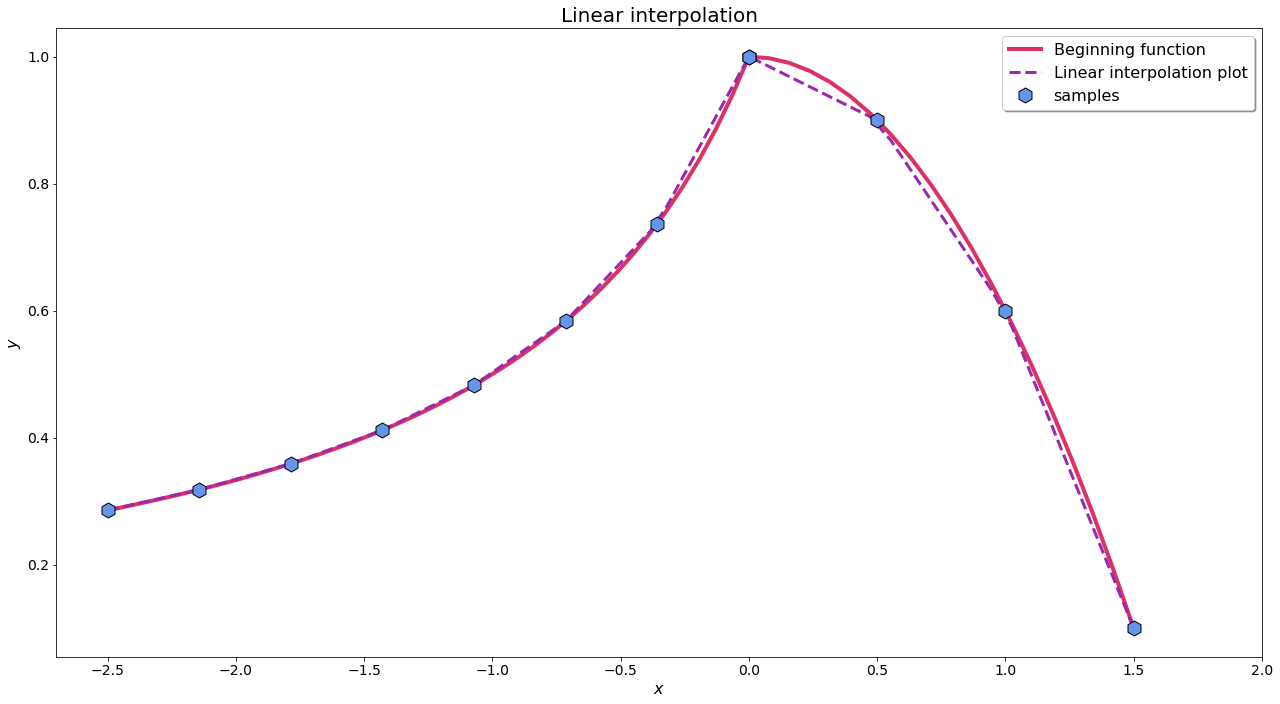

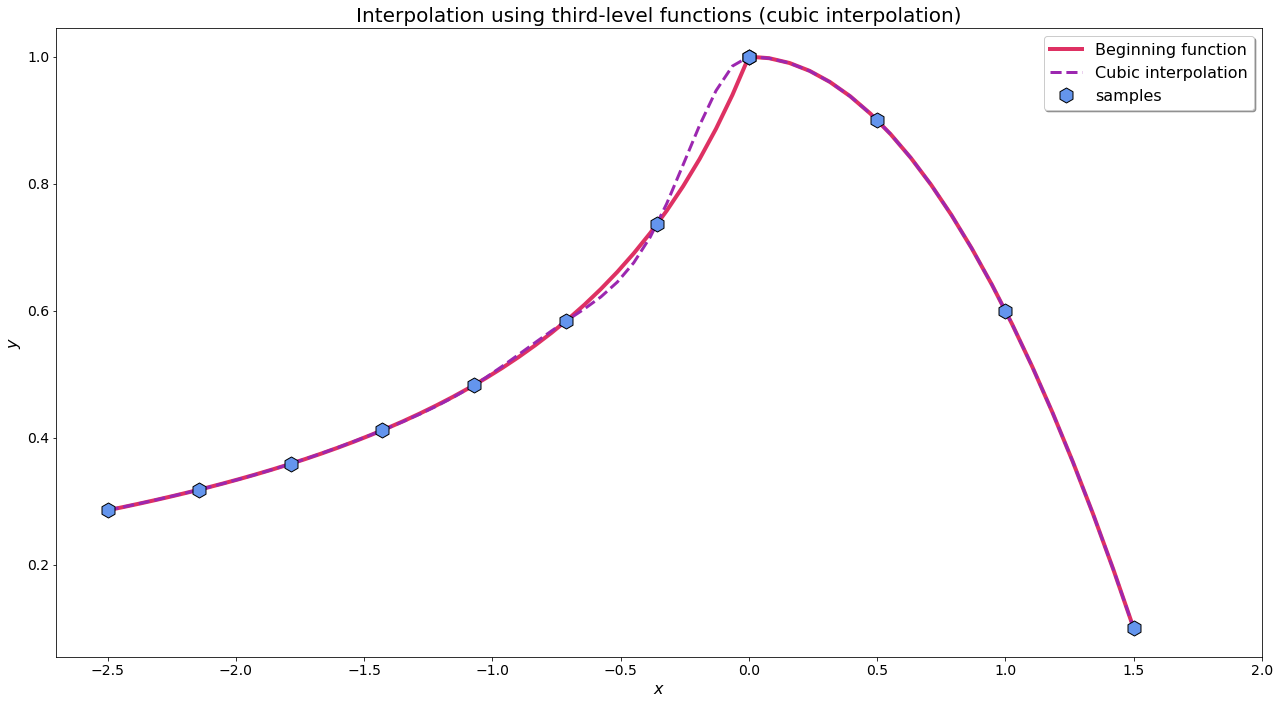

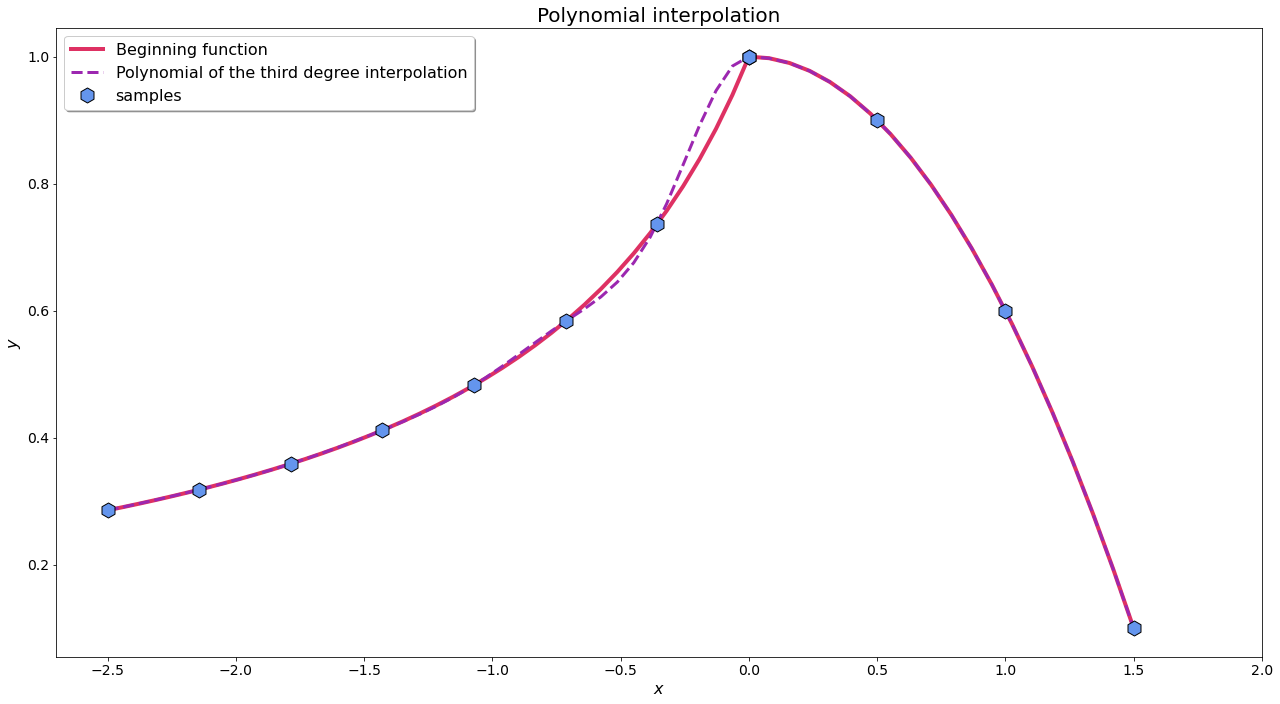

In [24]:
lpe = lambda x: (-1 / (x - 1))
rpe = lambda x: -0.4 * x ** 2 + 1

for index, kind in enumerate(['linear', 'cubic', 'polynomial']):

    if kind != 'polynomial':
        xs, ys, xr, yff, yr = generating_data_and_making_interpolation(lpe, rpe, 8, 4, kind, False)
        drawing_plot(xs, ys, xr, yff, yr, settings[index])
    else:
        xs, ys, xr, yff, yr = generating_data_and_making_interpolation(lpe, rpe, 8, 4, kind, True)
        drawing_plot(xs, ys, xr, yff, yr, settings[index])

##### In this case linear interpolation managed to deal with this problem in a very appriopriate way and its values are very close to real ones. Cubic interpolation and polynomial interpolation results look exactly the same. Both of them reproduced values which are equal to real ones when dealing with $x > 0$. However, they had some problems to reproduce values for arguments less then zero - these values are higher. 

#### Task 4 and 5

##### Generating data

In [25]:
f = lambda x, y: x **2 - y ** 2
x = np.random.random_sample(20)
y = np.random.random_sample(20)
z = f(x, y)

x_samples, y_samples = np.meshgrid(x, y)
z_samples = f(x_samples, y_samples)

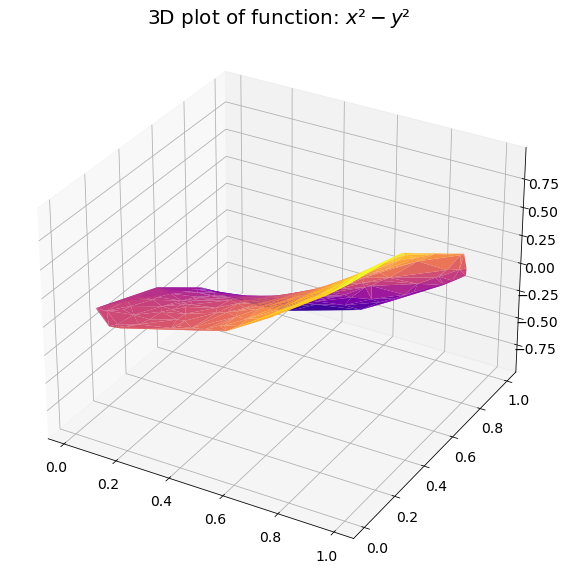

In [26]:
x_plot = np.random.random_sample(200)
y_plot = np.random.random_sample(200)

x_plot_m, y_plot_m = np.meshgrid(x_plot, y_plot)
z_plot = f(x_plot, y_plot)


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D plot of function: $x\u00B2 - y\u00B2$', fontsize=20)
ax.plot_trisurf(x_plot, y_plot, z_plot, cmap="plasma")

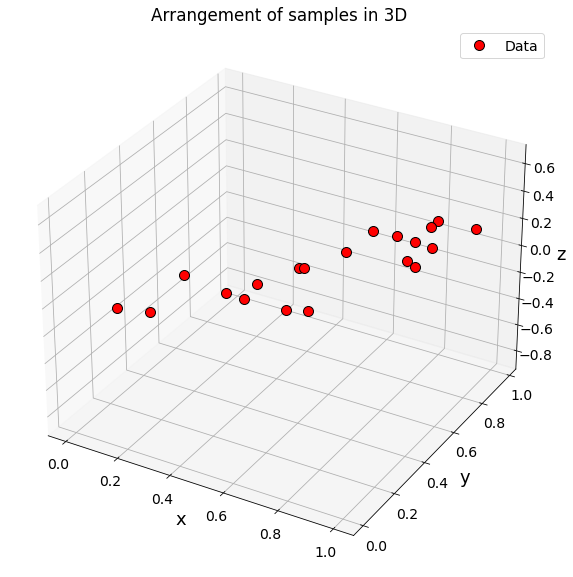

In [27]:
params = {'font.size'     : 14,
          'lines.linewidth': 2.,
          'lines.markersize': 10,}
plt.rcParams.update(params)


fig, ax = plt.subplots(1, 2, figsize=(10, 10))
fig.clf()

ax[0] = plt.axes(projection='3d')

ax[0].plot(x, y, z, "or", label='Data', markeredgecolor='black')
ax[0].set_xlabel('x', fontsize=18)
ax[0].set_ylabel('y', fontsize=18)
ax[0].set_zlabel('z', fontsize=18)
ax[0].set_xticks((np.linspace(0, 1, 6)))
ax[0].set_yticks((np.linspace(0, 1, 6)))
ax[0].set_title("Arrangement of samples in 3D")


plt.legend()

plt.show()

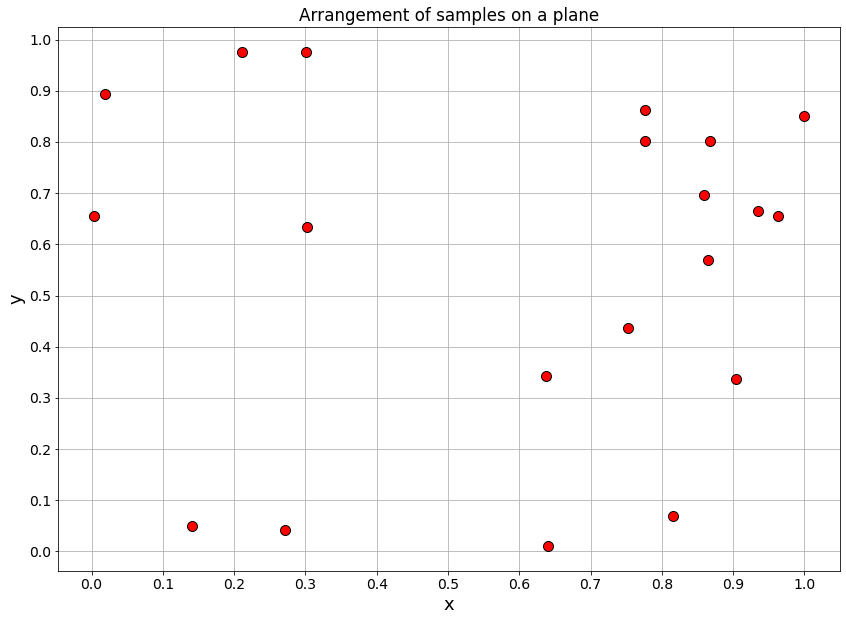

In [28]:
fig = plt.gcf()
fig.set_size_inches(14, 10)

ax[1] = plt.axes()
ax[1].plot(x, y, "or", label='Data', markeredgecolor='black')
ax[1].set_xlabel('x', fontsize=18)
ax[1].set_ylabel('y', fontsize=18)
ax[1].set_xticks((np.linspace(0, 1, 11)))
ax[1].set_yticks((np.linspace(0, 1, 11)))
ax[1].set_title('Arrangement of samples on a plane')

plt.grid(True)
plt.show()

In [29]:
Mx, My = 8, 8
mx_coords = np.linspace(x.min(), x.max(), Mx)
my_coords = np.linspace(y.min(), y.max(), My)
X_resamples, Y_resamples = np.meshgrid(mx_coords, my_coords)

res = 1000
original_x = np.linspace(x.min(), x.max(), res)
original_y = np.linspace(y.min(), y.max(), res)

X, Y = np.meshgrid(original_x, original_y)
Z = f(X, Y)

##### Plots drawing function

In [30]:
def drawing_plots(X, Y, Z, x, y, X_resamples, Y_resamples, Z_resamples, interpoplation_type='Linear'):
    fig, ax = plt.subplots(1, 2, figsize=(16, 7))

    c = ax[0].contourf(X, Y, Z, 15, cmap=plt.cm.plasma)

    ax[0].set_xlabel("$x$", fontsize=14)
    ax[0].set_ylabel("$y$", fontsize=14)
    ax[0].plot(x, y, 'x', color='black', label='Samples')
    ax[0].plot(X_resamples, Y_resamples, '.', color='gray', alpha=0.5)
    ax[0].set_title("Original function: x\u00B2 - y\u00B2")
    ax[0].legend(loc='upper left', fontsize=12)

    cb = fig.colorbar(c, ax=ax[0])
    cb.set_label("$z$", fontsize=14)

    c = ax[1].contourf(X_resamples, Y_resamples, Z_resamples, 15, cmap=plt.cm.plasma)

    ax[1].set_xlabel("$x$", fontsize=14)
    ax[1].set_ylabel("$y$", fontsize=14)
    ax[1].set_title(f"{interpoplation_type} interpolation")
    
    cb = fig.colorbar(c, ax=ax[1])
    cb.set_label("$z$", fontsize=14)

    plt.tight_layout()
    plt.show()

##### Linear interpolation using scipy module

In [31]:
linear_interpolate_obj = interpolate.interp2d(x, y, z_samples, kind='linear')
Z_resamples = linear_interpolate_obj(mx_coords, my_coords)

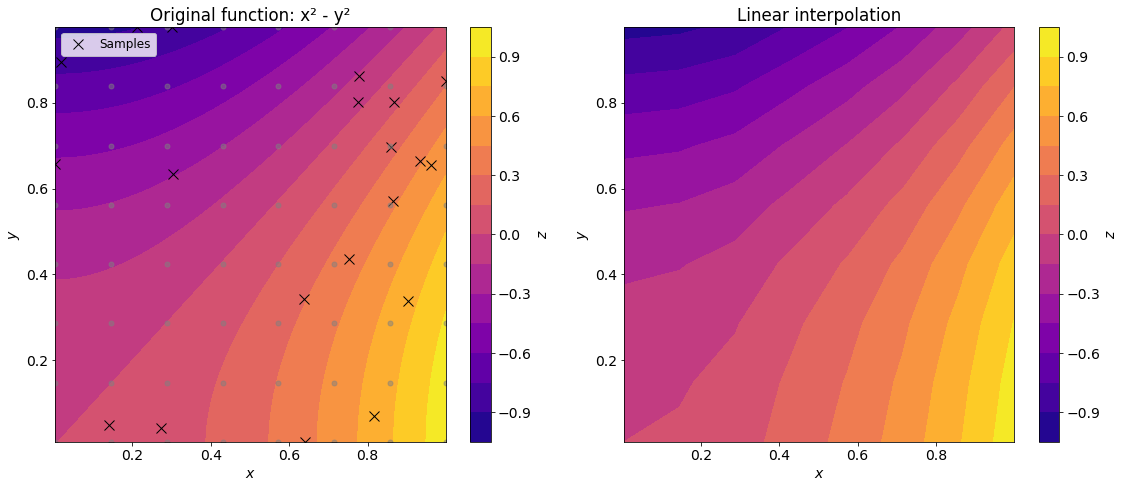

In [32]:
drawing_plots(X, Y, Z, x, y, X_resamples, Y_resamples, Z_resamples)

##### Cubic interpolation

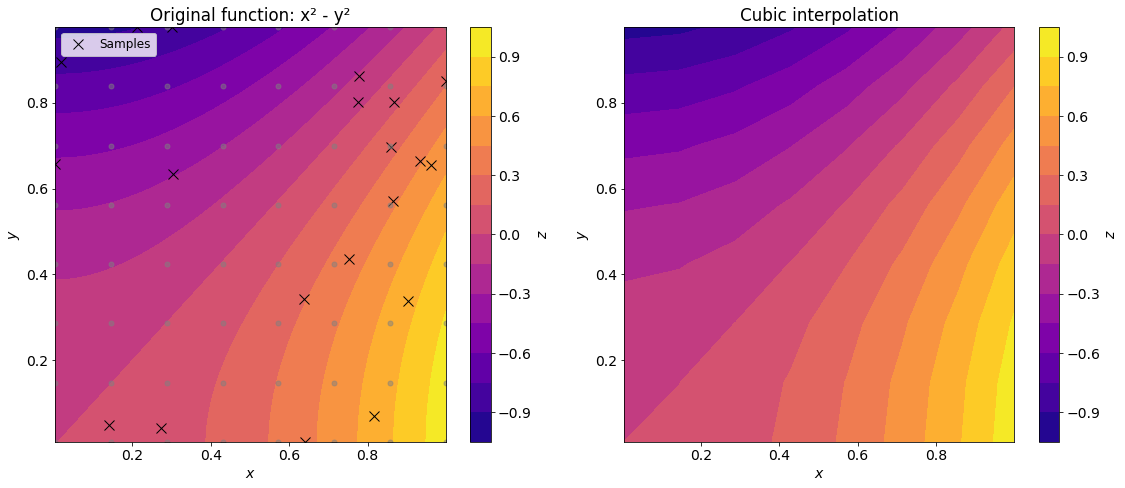

In [33]:
cubic_interpolate_obj = interpolate.interp2d(x, y, z_samples, kind='cubic')
Z_resamples = cubic_interpolate_obj(mx_coords, my_coords)

drawing_plots(X, Y, Z, x, y, X_resamples, Y_resamples, Z_resamples, 'Cubic')


##### Nearest neighbour method interpolation

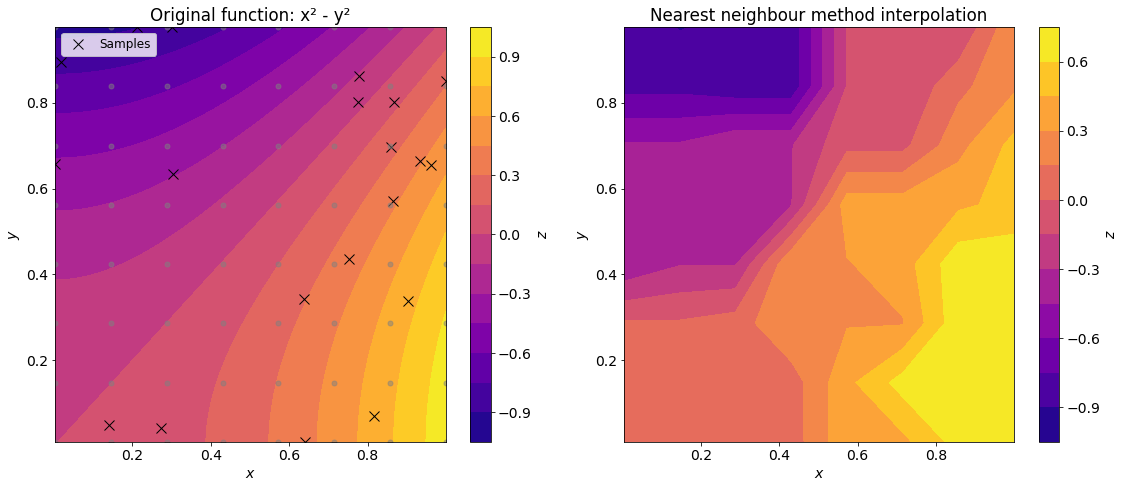

In [34]:
Z_resamples = interpolate.griddata((x, y), z, (X_resamples, Y_resamples), method='nearest')

drawing_plots(X, Y, Z, x, y, X_resamples, Y_resamples, Z_resamples, 'Nearest neighbour method')

##### Let's try for 100 samples using nearest neighbour interpolation

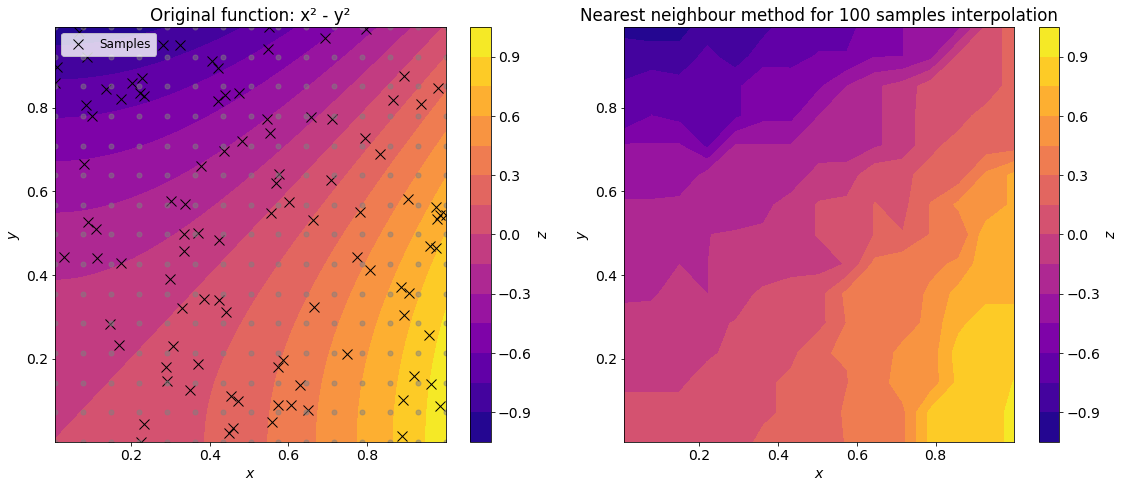

In [35]:
x = np.random.random_sample(100)
y = np.random.random_sample(100)
z = f(x, y)

Mx, My = 15, 15
mx_coords = np.linspace(x.min(), x.max(), Mx)
my_coords = np.linspace(y.min(), y.max(), My)

X_resamples, Y_resamples = np.meshgrid(mx_coords, my_coords)

res, margin = 1000, 0.1
original_x = np.linspace(x.min(), x.max(), res)
original_y = np.linspace(y.min(), y.max(), res)
X, Y = np.meshgrid(original_x, original_y)
Z = f(X, Y)

Z_resamples = interpolate.griddata((x, y), z, (X_resamples, Y_resamples), method='nearest')

drawing_plots(X, Y, Z, x, y, X_resamples, Y_resamples, Z_resamples, 'Nearest neighbour method for 100 samples')

##### 

##### Linear and cubic interpolation performed in almost identical way, and their plots appearance, which is a 2D plot with counter lines showing third dimension $z$, look very similar to original function, only with several skews. As expected, k-neighbours method interpolation returns plot which resembles original function plot, but values are definitely different then reals ones - we can easily see areas which were classified to each nearest neighbour. As a result we did not get smooth lines respresenting counter lines. For one hundred samples, plot look more similar to original function, but still many distortions can be observed. I am a little bit surprised how properly has linear interpolation performed.
